# Model training

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [2]:
outdir = "out_p_a1_given_q_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_given_q_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.0,-1.0,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.0,-0.8,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.0,-0.6,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.0,-0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.0,-0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...
116,1.0,0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[1.0680033419862862, 1.0678605941877117, 1.067..."
117,1.0,0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[0.7832345001188603, 0.7843442342552497, 0.784..."
118,1.0,0.6,"[0.2064128256513026, 0.2080031807101176, 0.209...","[0.0003581317510958827, 0.0006423405154926148,..."
119,1.0,0.8,"[0.6112224448897795, 0.6120015582266737, 0.612...","[0.003378646421929789, 0.004692188317429458, 0..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [4]:
data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)

In [5]:
data.reset_index(drop=True, inplace=True)

Stupid way of getting everything to a numpy array with dtyoe = float64

In [6]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

In [7]:
# from sklearn.preprocessing import normalize
# p_norm = normalize(p,axis=0)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

### Pair q and xeff

In [9]:
train_q_xeff = np.stack((train_q, train_xeff), axis=1)

## Define model

In [10]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
# x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 502)          0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 512)          257536      ['concatenate[0][0]']        

In [11]:
opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 4.6684 - accuracy: 0.0000e+00 - val_loss: 2.0906 - val_accuracy: 0.0000e+00 - 520ms/epoch - 65ms/step
Epoch 2/500
8/8 - 0s - loss: 3.8801 - accuracy: 0.0000e+00 - val_loss: 1.8274 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 3.5157 - accuracy: 0.0000e+00 - val_loss: 1.6778 - val_accuracy: 0.0000e+00 - 28ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 3.1718 - accuracy: 0.0000e+00 - val_loss: 1.6023 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 3.0432 - accuracy: 0.0000e+00 - val_loss: 1.5624 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 2.9713 - accuracy: 0.0175 - val_loss: 1.5543 - val_accuracy: 0.0000e+00 - 28ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 2.9994 - accuracy: 0.0000e+00 - val_loss: 1.5654 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 8/500
8/8 - 0s - loss: 3.0499 - accuracy: 0.0000e+00 - val_loss: 1.5828 - val_accuracy: 0.000

Text(0, 0.5, 'loss')

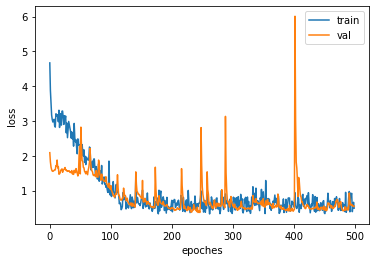

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

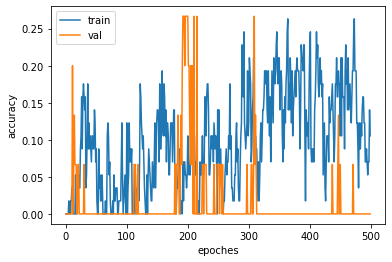

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [14]:
# evaluate model
test_q_xeff = np.stack((test_q, test_xeff), axis=1)
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])

1/1 [==============================] - 0s 17ms/step - loss: 0.6600 - accuracy: 0.0000e+00


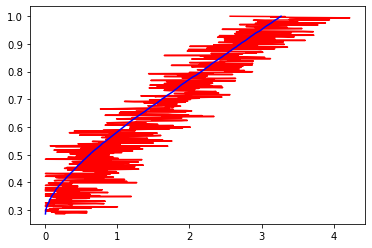

In [15]:
plt.plot(test_p_pred[3],test_a1[3],label = 'pred',color = 'red')
plt.plot(test_p[3],test_a1[3],label = 'true',color = 'blue')

### Seems like overfitting, add dropout

In [17]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [18]:
opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 4.8111 - accuracy: 0.0351 - val_loss: 2.2489 - val_accuracy: 0.0000e+00 - 605ms/epoch - 76ms/step
Epoch 2/500
8/8 - 0s - loss: 4.0017 - accuracy: 0.0175 - val_loss: 1.9858 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 3.2027 - accuracy: 0.0175 - val_loss: 1.6755 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 2.8998 - accuracy: 0.0702 - val_loss: 1.6031 - val_accuracy: 0.0000e+00 - 30ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 2.2489 - accuracy: 0.0351 - val_loss: 1.5683 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 2.2527 - accuracy: 0.0000e+00 - val_loss: 1.1964 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 2.0348 - accuracy: 0.0351 - val_loss: 1.0750 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 8/500
8/8 - 0s - loss: 2.0213 - accuracy: 0.0351 - val_loss: 1.0056 - val_accuracy: 0.0000e+00 - 31ms/epoch - 4ms

1/1 [==============================] - 0s 19ms/step - loss: 0.5214 - accuracy: 0.4444


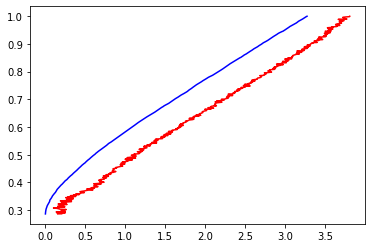

In [19]:
# evaluate model
test_q_xeff = np.stack((test_q, test_xeff), axis=1)
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')

### Finally getting better, try reducing lr

In [20]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 0s - loss: 5.1469 - accuracy: 0.0000e+00 - val_loss: 2.5783 - val_accuracy: 0.0000e+00 - 446ms/epoch - 56ms/step
Epoch 2/500
8/8 - 0s - loss: 5.0023 - accuracy: 0.0000e+00 - val_loss: 2.5641 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 4.9326 - accuracy: 0.0000e+00 - val_loss: 2.5540 - val_accuracy: 0.0000e+00 - 35ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 4.8129 - accuracy: 0.0000e+00 - val_loss: 2.5457 - val_accuracy: 0.0000e+00 - 48ms/epoch - 6ms/step
Epoch 5/500
8/8 - 0s - loss: 4.7787 - accuracy: 0.0000e+00 - val_loss: 2.5325 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 4.7279 - accuracy: 0.0000e+00 - val_loss: 2.5242 - val_accuracy: 0.0000e+00 - 37ms/epoch - 5ms/step
Epoch 7/500
8/8 - 0s - loss: 4.5805 - accuracy: 0.0000e+00 - val_loss: 2.5179 - val_accuracy: 0.0000e+00 - 40ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 4.5648 - accuracy: 0.0000e+00 - val_loss: 2.5081 - val_accuracy: 0

### Not good, try adding 1 more layer and dial lr bacck

In [22]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
x = keras.layers.Dense(1024, activation='relu')(merged)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 0s - loss: 5.1177 - accuracy: 0.0000e+00 - val_loss: 2.5224 - val_accuracy: 0.0000e+00 - 463ms/epoch - 58ms/step
Epoch 2/500
8/8 - 0s - loss: 4.9817 - accuracy: 0.0000e+00 - val_loss: 2.5078 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 4.9658 - accuracy: 0.0000e+00 - val_loss: 2.4970 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 4.8352 - accuracy: 0.0000e+00 - val_loss: 2.4855 - val_accuracy: 0.0000e+00 - 39ms/epoch - 5ms/step
Epoch 5/500
8/8 - 0s - loss: 4.7103 - accuracy: 0.0000e+00 - val_loss: 2.4720 - val_accuracy: 0.0000e+00 - 34ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 4.6856 - accuracy: 0.0000e+00 - val_loss: 2.4639 - val_accuracy: 0.0000e+00 - 41ms/epoch - 5ms/step
Epoch 7/500
8/8 - 0s - loss: 4.5564 - accuracy: 0.0000e+00 - val_loss: 2.4559 - val_accuracy: 0.0000e+00 - 51ms/epoch - 6ms/step
Epoch 8/500
8/8 - 0s - loss: 4.5384 - accuracy: 0.0000e+00 - val_loss: 2.4501 - val_accuracy: 0

1/1 [==============================] - 0s 24ms/step - loss: 1.3941 - accuracy: 0.0000e+00


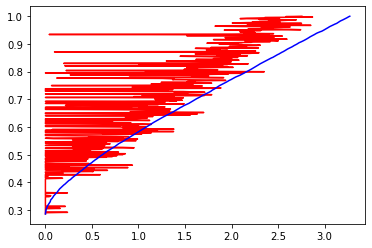

In [23]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_p_pred[3],test_a1[3],label = 'pred',color = 'red')
plt.plot(test_p[3],test_a1[3],label = 'true',color = 'blue')

### Not good, change back and introduce more neurons

In [24]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
x = keras.layers.Dense(1024, activation='relu')(merged)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 0s - loss: 4.8786 - accuracy: 0.0000e+00 - val_loss: 2.5058 - val_accuracy: 0.0000e+00 - 476ms/epoch - 60ms/step
Epoch 2/500
8/8 - 0s - loss: 4.6870 - accuracy: 0.0000e+00 - val_loss: 2.4760 - val_accuracy: 0.0000e+00 - 97ms/epoch - 12ms/step
Epoch 3/500
8/8 - 0s - loss: 4.5625 - accuracy: 0.0000e+00 - val_loss: 2.4591 - val_accuracy: 0.0000e+00 - 63ms/epoch - 8ms/step
Epoch 4/500
8/8 - 0s - loss: 4.3551 - accuracy: 0.0000e+00 - val_loss: 2.4324 - val_accuracy: 0.0000e+00 - 44ms/epoch - 5ms/step
Epoch 5/500
8/8 - 0s - loss: 4.2733 - accuracy: 0.0000e+00 - val_loss: 2.4170 - val_accuracy: 0.0000e+00 - 49ms/epoch - 6ms/step
Epoch 6/500
8/8 - 0s - loss: 4.2344 - accuracy: 0.0000e+00 - val_loss: 2.3952 - val_accuracy: 0.0000e+00 - 66ms/epoch - 8ms/step
Epoch 7/500
8/8 - 0s - loss: 4.0410 - accuracy: 0.0000e+00 - val_loss: 2.3860 - val_accuracy: 0.0000e+00 - 41ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 3.9243 - accuracy: 0.0000e+00 - val_loss: 2.3774 - val_accuracy: 

1/1 [==============================] - 0s 24ms/step - loss: 0.8615 - accuracy: 0.0000e+00


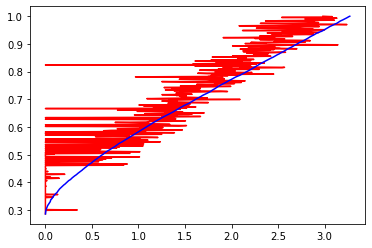

In [25]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_p_pred[3],test_a1[3],label = 'pred',color = 'red')
plt.plot(test_p[3],test_a1[3],label = 'true',color = 'blue')

### ...

In [36]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='sigmoid')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 4.8775 - accuracy: 0.0175 - val_loss: 2.4658 - val_accuracy: 0.0667 - 949ms/epoch - 119ms/step
Epoch 2/500
8/8 - 0s - loss: 4.4061 - accuracy: 0.0000e+00 - val_loss: 2.3632 - val_accuracy: 0.0667 - 29ms/epoch - 4ms/step
Epoch 3/500
8/8 - 0s - loss: 3.8862 - accuracy: 0.0000e+00 - val_loss: 2.2404 - val_accuracy: 0.0667 - 28ms/epoch - 3ms/step
Epoch 4/500
8/8 - 0s - loss: 3.2858 - accuracy: 0.0000e+00 - val_loss: 2.0698 - val_accuracy: 0.0667 - 28ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 2.9385 - accuracy: 0.0000e+00 - val_loss: 1.9064 - val_accuracy: 0.0667 - 28ms/epoch - 3ms/step
Epoch 6/500
8/8 - 0s - loss: 2.4474 - accuracy: 0.0000e+00 - val_loss: 1.7443 - val_accuracy: 0.0667 - 27ms/epoch - 3ms/step
Epoch 7/500
8/8 - 0s - loss: 1.8924 - accuracy: 0.0175 - val_loss: 1.6401 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 8/500
8/8 - 0s - loss: 2.0045 - accuracy: 0.0175 - val_loss: 1.5380 - val_accuracy: 0.0000e+00 - 28ms/epoch - 4ms/step
E

1/1 [==============================] - 0s 17ms/step - loss: 0.2537 - accuracy: 0.0000e+00


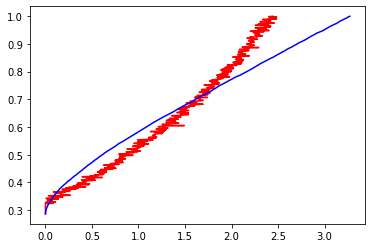

In [37]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_p_pred[3],test_a1[3],label = 'pred',color = 'red')
plt.plot(test_p[3],test_a1[3],label = 'true',color = 'blue')